In [307]:
def split_array(array,k):
    n = len(array)
    sub_array_size = n//k
    rem_elements = n%k
    start_index = 0
    sub_array = []
    for i in range (k):
        sub_array_end = start_index + sub_array_size
        sub_array.append(array[start_index:sub_array_end])
        start_index = sub_array_end
        
    if rem_elements > 0:
        sub_array[-1].extend(array[sub_array_end:])
    return sub_array
        

In [308]:
def merge_sorted_arrays(arrays):
    k =len(arrays)
    n = sum(len(arr) for arr in arrays)
    pointers = [0]*k
    result_arr = [0]*n

    
    for t in range(1,n+1):
        max_item = -10000
        max_item_arr_index = -1
        
        for i in range(k):
            l = len(arrays[i])
            if pointers[i]<len(arrays[i]) and max_item < arrays[i][l - pointers[i] -1]:
                max_item = arrays[i][l-pointers[i]-1] 
                max_item_arr_index = i
            
        result_arr[n-t] = max_item 
        # print(result_arr)
        pointers[max_item_arr_index] += 1
    
    return result_arr
                             

In [309]:
def insertion_sort(arr):
    for i in range(1,len(arr)):
        key = arr[i]
        j= i-1
        while j>=0 and key<arr[j]:
            arr[j+1]=arr[j]
            j-=1
        arr[j+1]=key
    return arr

In [310]:
def merge_sort(arr):
    if len(arr)>1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]
        
        merge_sort(L)
        merge_sort(R)
        
        i=j=k=0
        
        
        while i<len(L) and j<len(R):
            if L[i]<=R[j]:
                arr[k] = L[i]
                i+=1
            
            else:
                arr[k] = R[j]
                j+=1
            k+=1
        
        while i<len(L):
            arr[k] = L[i]
            i+=1
            k+=1
        
        while j<len(R):
            arr[k] = R[j]
            j+=1
            k+=1
    return arr
    

In [311]:
import time
import random
random.seed = 0
arr = [random.randint(1,100) for i in range(100)]
arr_merge = arr
time_arr = []
partition = []
for k in range(1,17):
    partition.append(k)
    start_time = time.time()
    split_arr = split_array(arr,k)
    
    for i in range(len(split_arr)):
        split_arr[i] = insertion_sort(split_arr[i])
        
    result_array = merge_sorted_arrays(split_arr)
    end_time = time.time()
    exec_time = end_time - start_time
    time_arr.append(exec_time)
# print(time_arr)


In [312]:
import time

time_arr_merge = []
partition = []
# print(arr_merge)
for k in range(1,17):
    partition.append(k)
    start_time = time.time()
    split_arr = split_array(arr_merge,k)
    
    for i in range(len(split_arr)):
        split_arr[i] = merge_sort(split_arr[i])
    result_array = merge_sorted_arrays(split_arr)
    # print(result_array)
    end_time = time.time()
    exec_time = end_time - start_time
    time_arr_merge.append(exec_time)
# print(time_arr_merge)

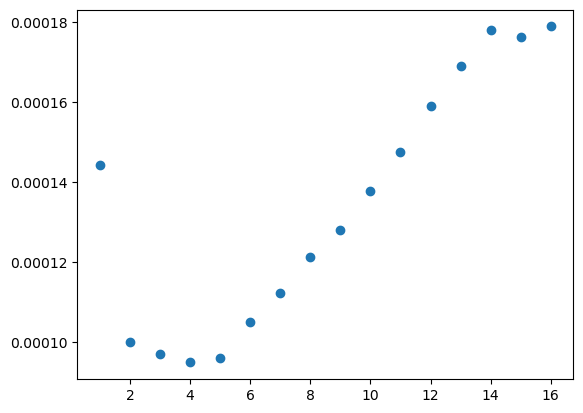

In [313]:
import matplotlib.pyplot as plt
plt.scatter(partition,time_arr)
plt.show()

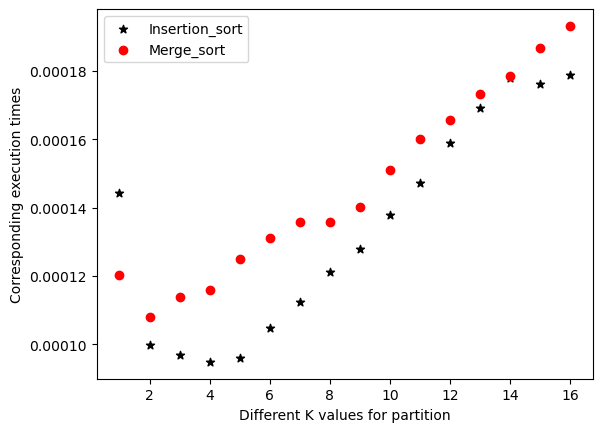

In [314]:
import matplotlib.pyplot as plt
plt.scatter(partition,time_arr,marker="*",color="black",label="Insertion_sort")
plt.scatter(partition,time_arr_merge,color="red",label="Merge_sort")
plt.xlabel("Different K values for partition")
plt.ylabel("Corresponding execution times")
plt.legend()
plt.show()


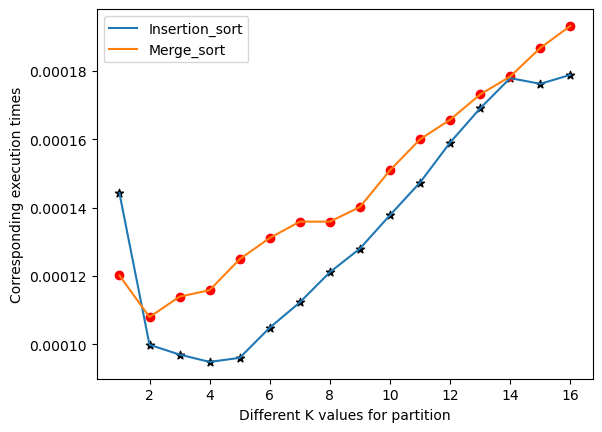

In [315]:
import matplotlib.pyplot as plt
plt.scatter(partition,time_arr,marker="*",color="black")
plt.scatter(partition,time_arr_merge,color="red")
plt.plot(partition,time_arr,label="Insertion_sort")
plt.plot(partition,time_arr_merge,label="Merge_sort")
plt.xlabel("Different K values for partition")
plt.ylabel("Corresponding execution times")
plt.legend()
plt.show()


## Dynamic Programming

In [3]:
import random
import matplotlib.pyplot as plt
import time


In [4]:

def kadane(arr):
    m = len(arr)
    local_max = 0
    global_max = -float('inf')
    for i in range(0, m):
        local_max = max(arr[i], arr[i] + local_max)
        if local_max > global_max:
            global_max = local_max
    return global_max

# %%


## Divide and Conquer

In [5]:
def maxCrossingSum(arr, low, mid, high):
    sum = 0
    left_sum = float("-inf")
    for i in range(mid, low-1, -1):
        sum += arr[i]

        if sum > left_sum:
            left_sum = sum

    sum = 0
    right_sum = float("-inf")
    for i in range(mid, high+1, 1):
        sum += arr[i]

        if sum > right_sum:
            right_sum = sum

    return max(
        left_sum,
        right_sum,
        left_sum + right_sum - arr[mid]
    )

def maxSubarraySum(arr, low, high):
    max_val = float("-inf")
    if low > high:
        return max_val
    if low == high:
        return arr[low]
    mid = (low + high) // 2

    return max(
        maxSubarraySum(arr, low, mid-1),
        maxSubarraySum(arr, mid+1, high),
        maxCrossingSum(arr, low, mid, high)
    )




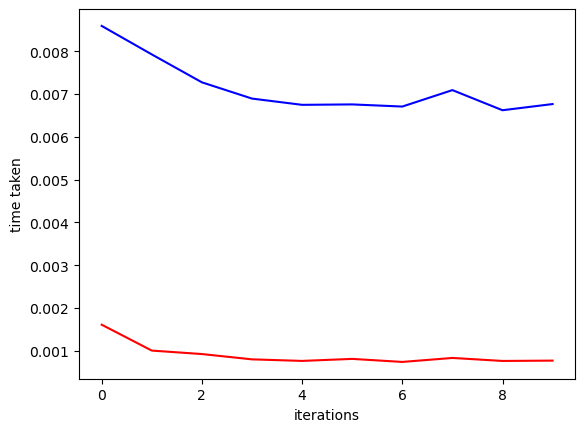

In [8]:
if __name__ == '__main__':
    time_arr_dp = []
    time_arr_dc = []
    for j in range(10):
        M = [random.randint(-6000, 6000) for i in range(10000)]
        # Dynamic Programming
        start_time = time.time()
        max_subarray_large = kadane(M)
        end_time = time.time()
        time_arr_dp.append(end_time - start_time)
        # Divide and Conquer
        start_time = time.time()
        dc_max = maxSubarraySum(M,0,len(M)-1)
        end_time = time.time()
        time_arr_dc.append(end_time - start_time)
    plt.plot(time_arr_dp,color = "red")
    plt.plot(time_arr_dc,color="blue")
    plt.xlabel("iterations")
    plt.ylabel("time taken")
    plt.show()
